# Pima Indians Diabetes Classification
`sklearn` 결정 트리를 이용한 분류
## 데이터 셋 출처
- [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
### 사용 라이브러리


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

### Data Load

In [2]:
df_pima = pd.read_csv("http://bit.ly/data-diabetes-csv")

### EDA
##### 데이터 형태 출력

In [3]:
df_pima.shape

(768, 9)

##### 데이터 SAMPLE을 5개만 출력해 봅니다
샘플의 경우, 랜덤하게 출력되다보니 기존 출력값과 값이 다를 수 있습니다

In [4]:
df_pima.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
625,4,90,88,47,54,37.7,0.362,29,0
156,2,99,52,15,94,24.6,0.637,21,0
273,1,71,78,50,45,33.2,0.422,21,0
276,7,106,60,24,0,26.5,0.296,29,1
67,2,109,92,0,0,42.7,0.845,54,0


데이터 정보를 확인해봅니다

In [5]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


수지형 변수 전체를 히스토그램으로 확인해보세요!  
bin 값은 50으로 설정했었지만, 변경하셔도 상관 없습니다!

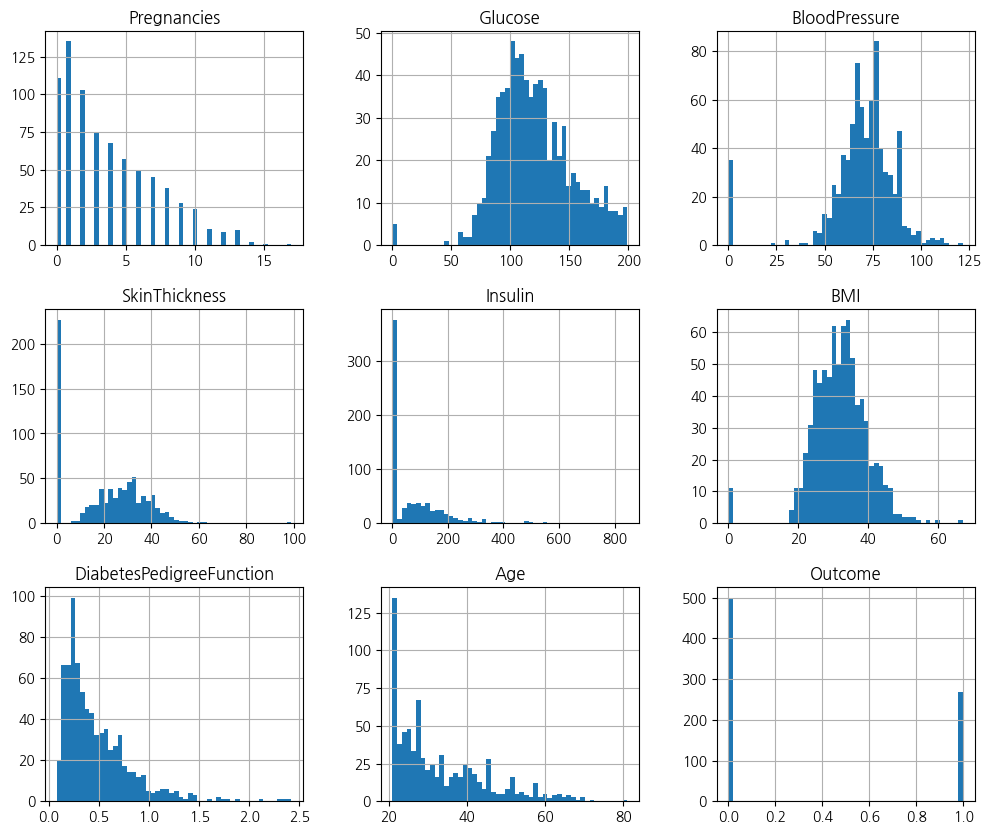

In [7]:
_ = df_pima.hist(bins=50, figsize=(12,10))

9개의 열을 가진 768개의 데이터


데이터 프레임의 컬럼 정보를 **리스트** 형태로 변환해 출력해주세요

In [8]:
df_pima.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm) -> 체지방 추정용
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0

### 기본적인 학습
히스토그램을 보면, `SkinThickness`와 `Insulin`, `BMI`에 이상치가 있다는 사실을 확인 할 수 있지만,  
일단 전처리를 하지 않은 상태에서 모델 성능 평가를해보고, 이후 하이퍼파라미터 튜닝을 진행하며 차이를 살펴 볼 예정  

지도 학습의 경우 기본적으로 문제의 답을 알려줘야하는데, 해당 데이터 셋에서는 `Outcome`이 답에 해당함

#### Note!
하이퍼파라미터와 파라미터는 다름  
| | Hyperparameter | Parameter |
| :---: | :---: | :---: |
| 설명 | 모델 학습 과정에 반영되는 값 | 모델 내부에서 결정되는 변수 |
| | 학습 전에 조절해야 됨 | 학습 또는 예측되는 값 |
| 예시 | 학습률 | 평균, 표준편차 |
| | 손실함수 | 회귀 계수 |
| | 배치 사이즈 | 가중치, 편향 |
| 조정 여부 | 가능 | 불가 |

하이퍼파라미터의 튜닝 방법은 굉장히 많음

#### 데이터 셋 나누기

In [12]:
separate_num = int(df_pima.shape[0] * 0.8)
separate_num

614

train set과 test set을 인덱싱을 이용해 나눠보세요!

In [15]:
train = df_pima[:separate_num]
test = df_pima[separate_num:]

print("train: ", train.shape)
print("test: ", test.shape)

train:  (614, 9)
test:  (154, 9)


위에서 나눈 train set과 test set을 다시 학습과 테스트를 위한 데이터로 나눠 보세요!

In [17]:
label_name = "Outcome"
feagure_name = df_pima.columns.tolist()
feagure_name.remove(label_name)
feagure_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [21]:
X_train = train[feagure_name]
y_train = train[label_name]
X_test = test[feagure_name]
y_test = test[label_name]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


인덱싱으로 구현한 부분을 사이킷런에 구현된 함수를 이용하면 간편하게 사용 가능합니다!

In [24]:
X = df_pima[feagure_name]
y = df_pima[label_name]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


`train_test_split`은 `sklearn` 내장 메서드로 위 과정을 상단 부분 생략 가능함.  
기본적인 파라미터는,
- `arrays`: 분할시킬 데이터
- `test_size`: 테스트 셋의 비율, `default=0.25`
- `train_size`: 학습 데이터 셋의 비율, `defalut=1-test_size`
- `random_state`
- `shuffle`: 기존 데이터를 나누기 전에 순서를 섞을것인지, `default=True`
- `stratify`: 지정한 데이터의 비율을 유지, 분류 문제의 경우 해당 옵션이 성능에 영향이 있다고는 함

#### 머신러닝 알고리즘 사용
#### 결정 트리 학습법 (Decision Tree Learning)
- 분류와 회귀에 모두 사용 가능한 `CART (Classificaton and Regression Trees)` 알고리즘  
- 어떤 항목에 대한 관측값과 목표값을 연결 시켜주는 예측 모델로서 사용  
  - 분류 트리: 목표 변수가 유한한 수의 값
  - 회귀 트리: 목표 변수가 연속하는 값
- 트리 최상단에는 가장 중요한 질문이 옴
- 결과를 해석(화이트박스 모델)하고 이해하기 쉬움
- 수치 / 범주형 자료에 모두 적용 가능
- 지니 불순도를 이용

#### 결정 트리 학습법 종류
- 랜덤 포레스트
- 부스트 트리
- 회전 포레스트

#### 지니 불순도 (Gini Impurity)
집합에 이질적인 것이 얼마나 섞여는지를 측정하는 지표  
$ I_G(f) = \sum_{i=1}^{m} f_i(1-f_i) $
- 불확실성을 의미 -> 얼마나 많은 것들이 섞여있는가?
- 한가지 특성을 가진 객체만 있을수록 집단을 설명하기 좋음
  - 특성이 동일해질수록 낮아짐
  - 특성이 다양할수록 높아짐


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # 최적의 분할을 위해 고려하는 특성의 개수 (int -> 개수 / float -> 비율)
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 방식
    * max_depth: 트리의 최대 깊이
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수
    * max_leaf_nodes: 리프 노드 숫자의 제한치
    * random_state: 추정기의 무작위성을 제어

In [26]:
# 사이킷런의 DT(의사결정 트리) 알고리즘을 불러옵니다
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [27]:
# Train
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Test - 예측을 해봅니다
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

#### 트리 알고리즘 분석
plot_tree를 이용해 DT 알고리즘을 시각화 해봅니다  
출력 사이즈는 예시 출력과 달라도 되지만, 크게 설정해서 출력해보세요!

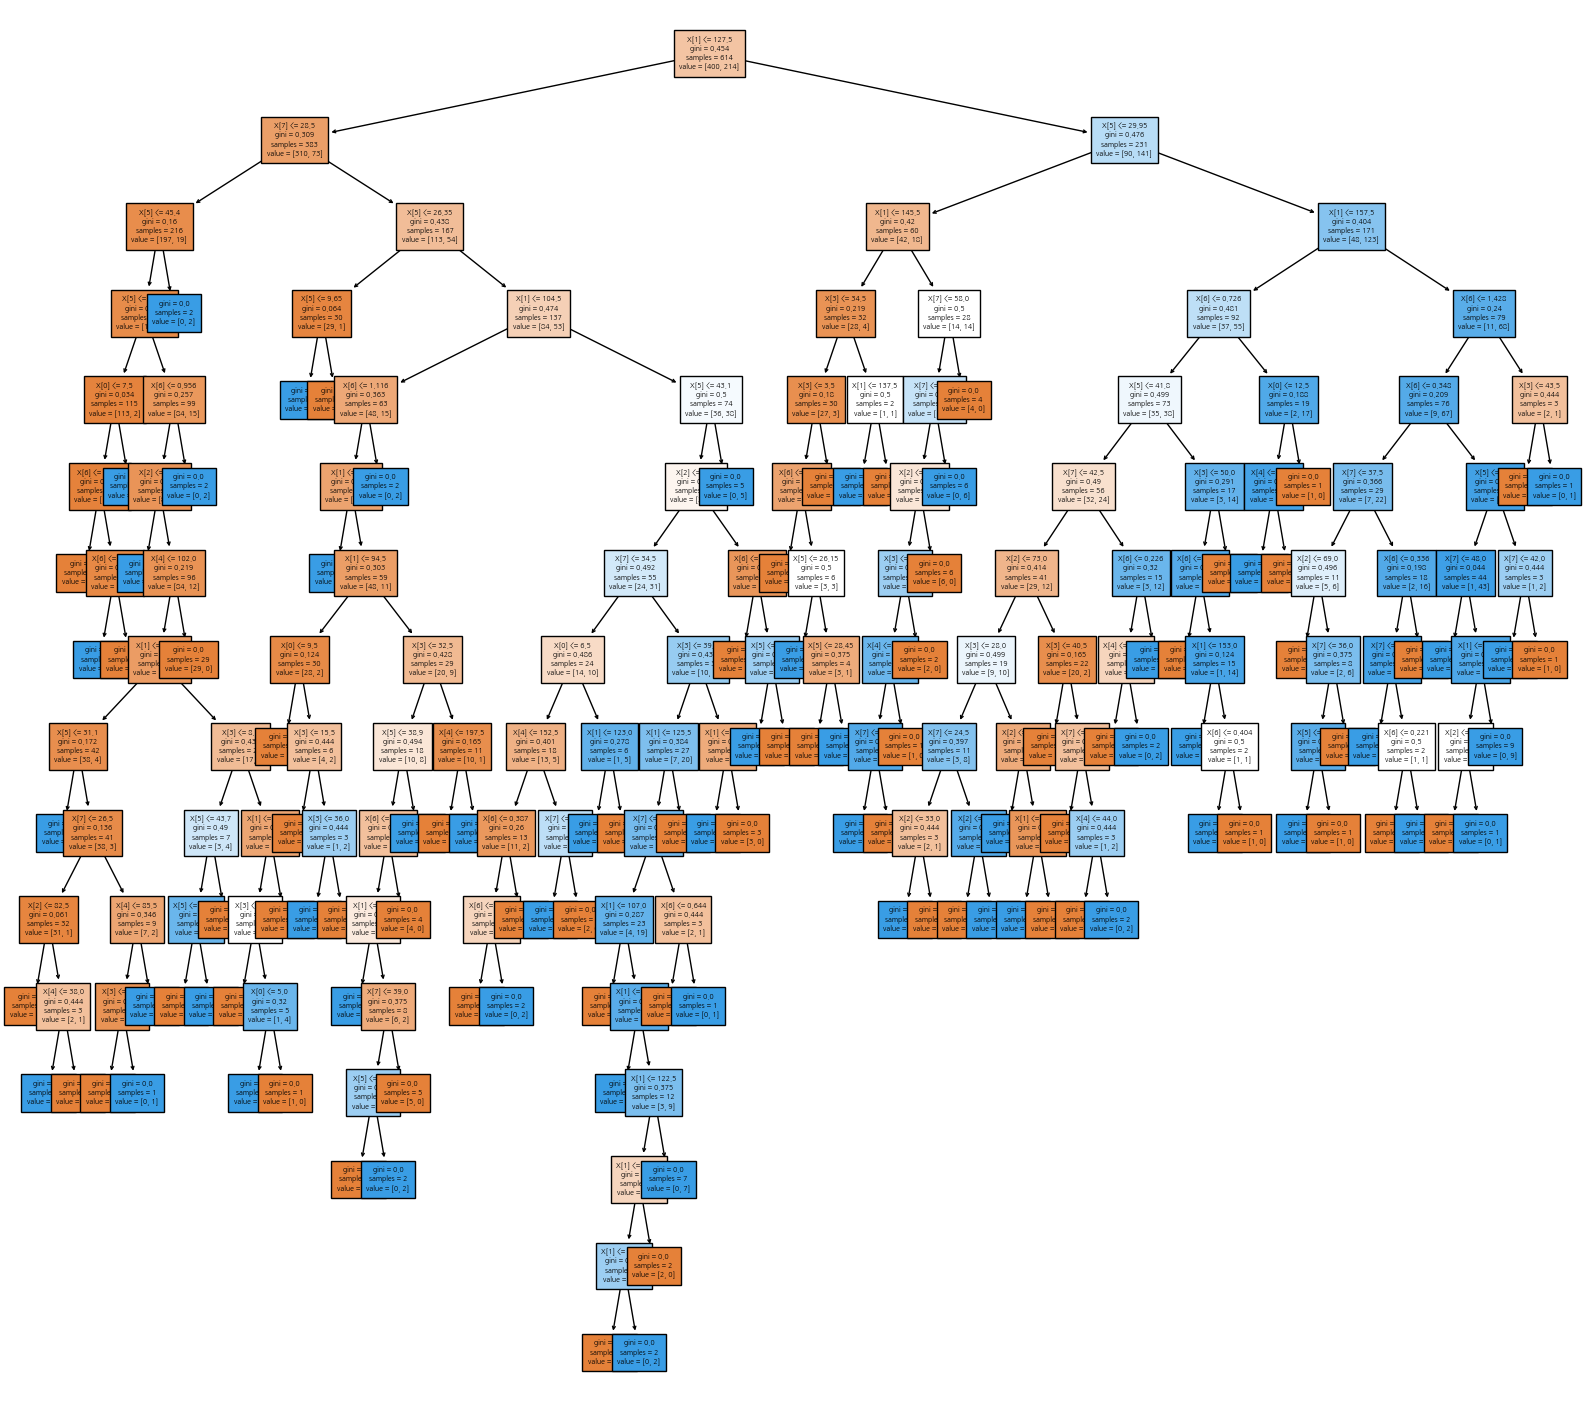

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,18))
plot_tree(model, fontsize=5, filled=True)
plt.show()

지니 계수가 0이되면 트리 생성을 제한하는데, 파라미터 튜닝을 진행하지 않은 상황에서는 16개의 Leaf node가 존재함  
그래프가 크므로 상위 4개 노드만 그려보면,  

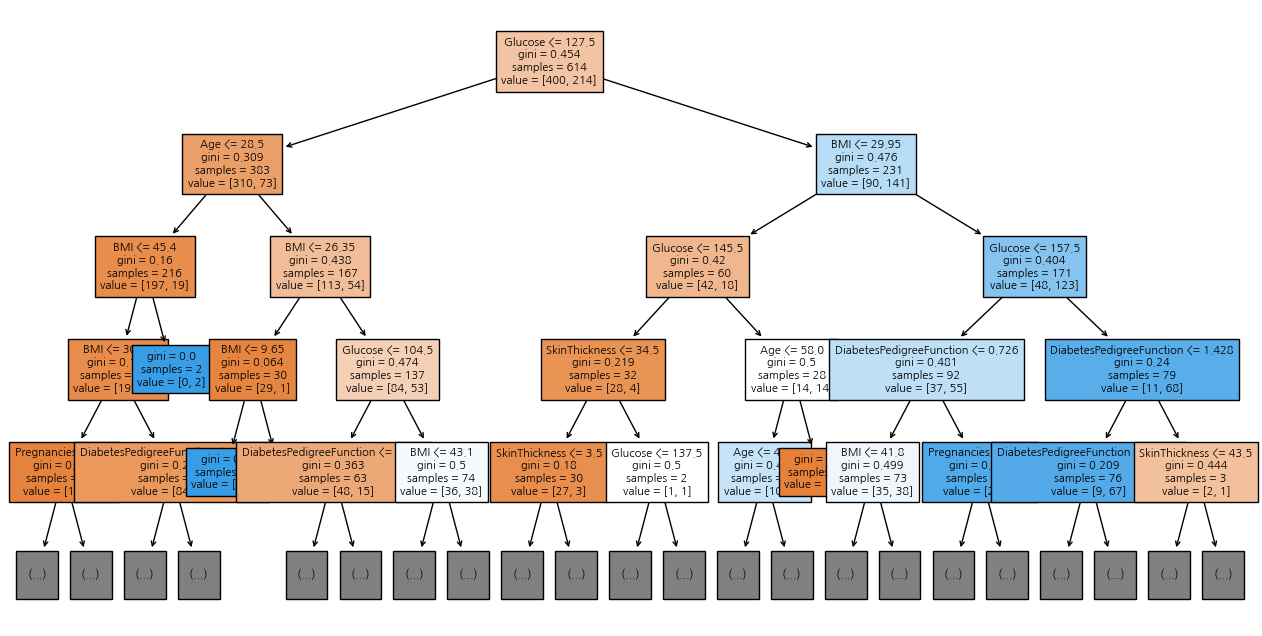

In [35]:
# 상위 4개 노드만 출력 해봅니다
plt.figure(figsize=(16,8))
plot_tree(model, fontsize=8, filled=True, max_depth=4, feature_names=feagure_name)
plt.show()

결정 트리의 최상위에 `Glucose`가 온 것을 확인 할 수 있음  
결정 트리의 최상단에는 가장 중요한 feature가 옴

##### 특성(feature)의 중요도 추출하기

In [36]:
model.feature_importances_

array([0.03257385, 0.32963206, 0.07644876, 0.07425352, 0.05126177,
       0.18230866, 0.11527032, 0.13825105])

In [37]:
# 특성의 중요도의 합을 구해 1이 나오는지 확인 해봅니다
model.feature_importances_.sum()

0.9999999999999999

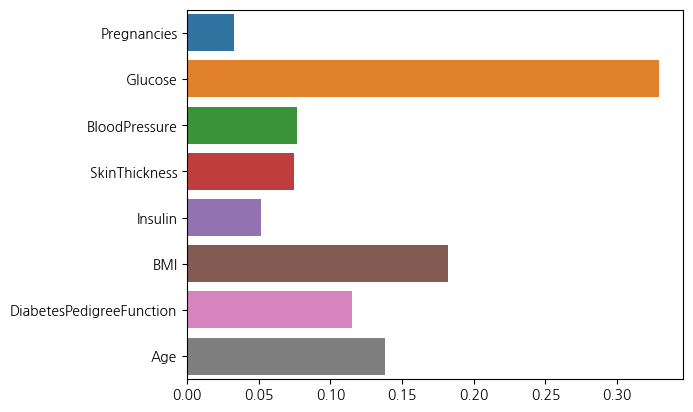

In [41]:
# 특성의 중요도를 시각화 해봅니다
_ = sns.barplot(x=model.feature_importances_, y=model.feature_names_in_ , ci=None)

#### 성능 평가
성능 평가 방식은 다양하나 정확도만을 이용해 성능을 평가함

In [42]:
# 사이킷런에 구현된 기능을 이용하지 말고 직접 정확도를 구해보세요!

(y_test == y_predict).mean()

0.7727272727272727

위와 같은 방식으로 정확도를 구할 수 있지만, `sklearn`의 내장 함수를 사용

In [43]:
# 사이킷런의 내장 함수로 정확도를 구해봅니다!
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7727272727272727

In [50]:
# 모델에서 score를 호출해 정확도를 구해봅니다!

model.score(X_test, y_test)

0.7727272727272727

### 결정 트리 모델의 하이퍼파라미터 조절
모델을 생성 할 때, 기본적으로 주어지는 피처의 개수나 최대 높이를 제한해 모델을 생성하고 성능을 평가해봄

In [51]:
# 결정 트리 모델의 최대 높이를 4로 제한하고, 고려하는 특성의 비율도 0.8로 조절해서 모델을 생성
# 학습과 예측까지 진행 해보세요!
# 예측값을 y_pre_max4라는 변수에 지정하면 이후 실습에서 코드를 수정하지 않아도 됩니다

model_max4 = DecisionTreeClassifier(random_state=42, max_depth=4, max_features=0.8)
model_max4.fit(X_train, y_train)
y_pre_max4 = model_max4.predict(X_test)

In [52]:
accuracy_score(y_test, y_pre_max4)

0.8116883116883117

3점 정도의 성능 향상이 있음  
모든 특성을 사용한다고 좋은 성능이 나오는 것은 아님

### Feature Engineering
Garbage In - Garbage Out, 잘 전처리된 데이터를 사용하면 좋은 성능이 나온다는 의미  
실제로 모델을 생성하기 이전에 EDA를 통해, 데이터를 분석하고 전처리하는 과정이 중요함

#### 수치형 변수를 범주형 변수로 만들기
먼저, 임신 횟수를 히스토그램으로 나타내 봅니다

In [54]:
df_pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

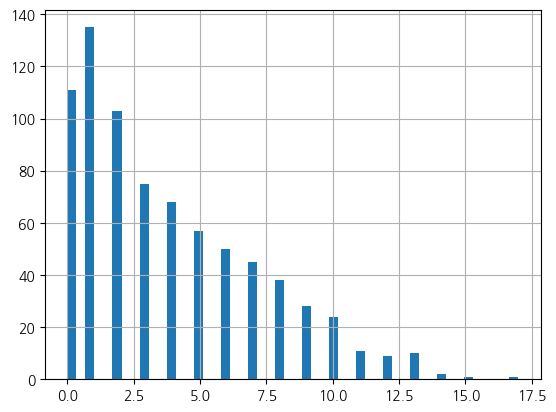

In [59]:
_ = df_pima["Pregnancies"].hist(bins=50)

임신 횟수를 당뇨병 여부를 기준으로 나타내 봅니다

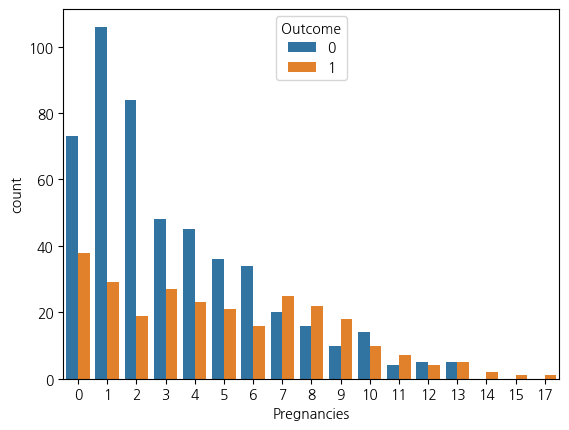

In [64]:
_ = sns.countplot(data=df_pima, x="Pregnancies", hue="Outcome")

Pima 인디언 데이터 셋에서 `Pregnancies`의 경우 3회 미만인 경우가 대부분임  
0 ~ 17까지 수치형 범주지만, 범주형 변주로 바꾸는 피쳐 엔지니어링을 진행함 -> 임신 횟수 6회를 기준으로 범주형으로 전환

In [65]:
df_pima["Pregnancies_high"] = df_pima["Pregnancies"] > 6
df_pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


In [153]:
# 피쳐 엔지니어링을 통해 아래 값과 동일하게 feature_name 변수에 리스트 형식으로 저장합니다
feature_name = df_pima.columns.tolist()
feature_name.remove("Pregnancies")
feature_name.remove(label_name)
feature_name

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [100]:
X = df_pima[feagure_name]
y = df_pima[label_name]
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [101]:
# DT를 이용해 학습과 예측을 진행해보세요!
# 해당 예측값을 y_pre_max4_Pre_high에 저장하면 이후 실습에서 코드를 수정하지 않아도 됩니다

model_max4_Pre_high = DecisionTreeClassifier(random_state=42, max_depth=4, max_features=0.8)
model_max4_Pre_high.fit(X_train, y_train)
y_pre_max4_Pre_high = model_max4_Pre_high.predict(X_test)

In [102]:
accuracy_score(y_test, y_pre_max4_Pre_high)

0.7532467532467533

같은 모델에서, 하나의 특성만 수치형에서 범주형으로 변경했는데 3점 정도의 성능 향상이 있었음

#### 결측치 처리하기
먼저, `Insulin`의 값을 히스토그램으로 시각화 해봅니다

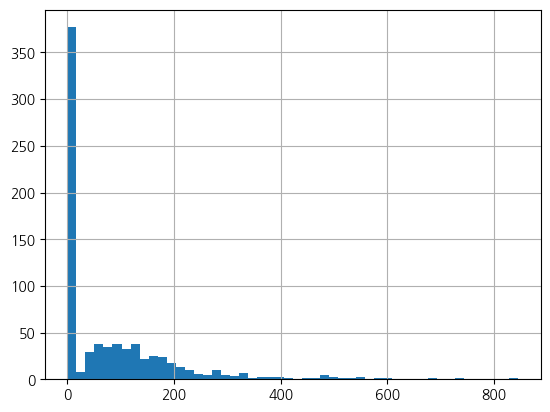

In [76]:
_ = df_pima["Insulin"].hist(bins=50)

`Insulin` 항목의 경우 0으로 기입된 결측치가 많이 존재함

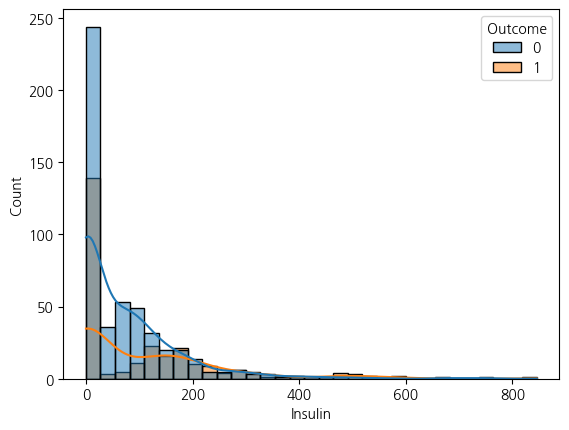

In [78]:
# Outcome을 기준으로, Insulin의 값을 구분해 KDE와 함께 시각화 해봅니다
_ = sns.histplot(data=df_pima, x="Insulin", kde=True, hue="Outcome")

`seaborn hist`에서 `kde(밀도 추정)`을하면 해당 레이블의 밀도를 확인 가능함

`Insulin` 항목에서 약 48%의 결측치가 존재함  
결측치를 해결하는 방법은 여러가지가 존재하지만, 중앙값으로 대체하는 방식과 평균값으로 보완 두 가지 방식으로 진행

In [79]:
# groupby를 통해 인슐린의 통계값을 구해보세요!
df_pima.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


In [163]:
feature_name.remove("Insulin") # 기존 인슐린 값
feature_name.append("Insulin_filled") # 결측치를 보완한 인슐린 값
feature_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Insulin_filled']

##### 중앙값 사용
중앙값을 이용해 결측치를 채워 봅니다

In [177]:
df_pima.loc[df_pima["Insulin"] > 0 , "Insulin_filled"] = df_pima["Insulin"]
Insulin_m = df_pima.groupby("Outcome")["Insulin_filled"].median()
print(Insulin_m)
Insulin_m[0] , Insulin_m[1]

Outcome
0    102.5
1    169.5
Name: Insulin_filled, dtype: float64


(102.5, 169.5)

In [178]:
df_pima.loc[(df_pima["Insulin_filled"].isna()) & (df_pima["Outcome"] == 0), "Insulin_filled"] = Insulin_m[0]
df_pima.loc[(df_pima["Insulin_filled"].isna()) & (df_pima["Outcome"] == 1), "Insulin_filled"] = Insulin_m[1]
df_pima["Insulin_filled"].isnull().sum()

0

In [179]:
df_pima.groupby("Outcome")["Insulin_filled"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,117.172000,75.685302,15.0,95.0,102.5,105.0,744.0
1,268.0,187.615672,94.114420,14.0,169.5,169.5,169.5,846.0


In [180]:
X = df_pima[feature_name]
y = df_pima[label_name]
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [181]:
# 결측치를 채운 데이터를 바탕으로 학습과 예측을 진행해봅니다
# 예측값을 y_pre_max4_50_per로 지정하면 이후 실습에서 코드를 수정 할 필요가 없습니다
model_max4_50_per = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=0.8)
model_max4_50_per.fit(X_train, y_train)
y_pre_max4_50_per = model_max4_50_per.predict(X_test)

In [182]:
accuracy_score(y_test, y_pre_max4_50_per)

0.8766233766233766

중앙값으로 `Insulin`의 결측치를 대체한 경우 약 11점 정도의 성능 향상이 있음

##### 평균값 사용
평균값을 이용해 결측치를 채워 봅니다

In [183]:
df_pima = df_pima.drop(columns="Insulin_filled")

In [184]:
df_pima.loc[df_pima["Insulin"] > 0 , "Insulin_filled"] = df_pima["Insulin"]
Insulin_mean = df_pima.groupby("Outcome")["Insulin_filled"].mean()
Insulin_mean

Outcome
0    130.287879
1    206.846154
Name: Insulin_filled, dtype: float64

In [185]:
df_pima.loc[(df_pima["Insulin_filled"].isna()) & (df_pima["Outcome"] == 0), "Insulin_filled"] = Insulin_mean[0]
df_pima.loc[(df_pima["Insulin_filled"].isna()) & (df_pima["Outcome"] == 1), "Insulin_filled"] = Insulin_mean[1]
print(df_pima["Insulin_filled"].isnull().sum())
df_pima.groupby("Outcome")["Insulin_filled"].describe()

0


,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,130.287879,74.400559,15.0,95.0,130.287879,130.287879,744.0
1,268.0,206.846154,92.237987,14.0,175.0,206.846154,206.846154,846.0


In [186]:
X = df_pima[feature_name]
y = df_pima[label_name]
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [189]:
# 결측치를 채운 데이터를 바탕으로 학습과 예측을 진행해봅니다
# 예측값을 y_pre_max4_mean로 지정하면 이후 실습에서 코드를 수정 할 필요가 없습니다

model_max4_mean = DecisionTreeClassifier(random_state=42, max_depth=4, max_features=0.8, min_samples_leaf=4)
model_max4_mean.fit(X_train, y_train)
y_pre_max4_mean = model_max4_mean.predict(X_test)

In [190]:
accuracy_score(y_test, y_pre_max4_mean)

0.8961038961038961

`Insulin`의 결측치를 처리하기 이전보다는 약 8점 정도의 성능 향상이 있지만, 중앙값으로 대체한 경우보다는 성능이 3점 정도 낮음

#### 이상치(Outlier)
결측치 처리를 2가지 방식으로 했지만, 이상치를 분석하는 과정은 **평균**으로 처리한 경우를 다룸

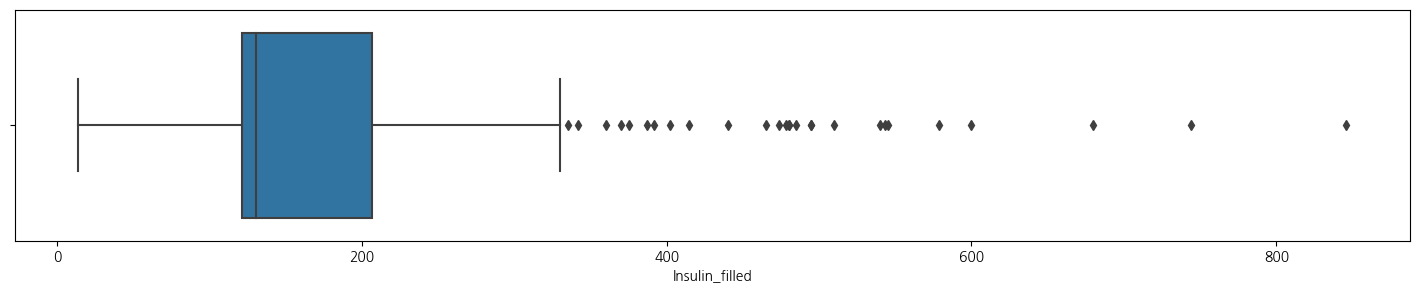

In [191]:
# 인슐린의 결측치를 평균값으로 처리한 경우의 이상치를 시각화 해봅니다

plt.figure(figsize=(18,3))
_ = sns.boxplot(data=df_pima, x="Insulin_filled")

In [192]:
# 통계값을 구해봅니다

df_pima["Insulin_filled"].describe()

count    768.000000
mean     157.003527
std       88.860914
min       14.000000
25%      121.500000
50%      130.287879
75%      206.846154
max      846.000000
Name: Insulin_filled, dtype: float64

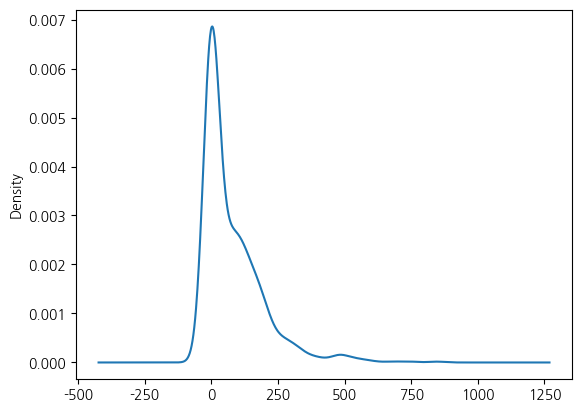

In [142]:
# KDE로 이상치 처리 이전의 값을 시각화 해봅니다
_ = df_pima["Insulin"].plot(kind="kde")

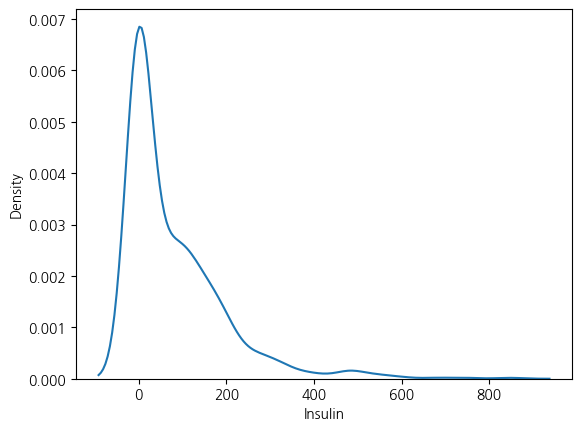

In [143]:
_ = sns.kdeplot(data=df_pima, x="Insulin")

결측치 문제를 해결했지만 이상치의 문제가 있음  
75%가 넘어가는 부분을 평균으로 대체해줌

In [193]:
insulin_des = df_pima["Insulin_filled"].describe()
print(insulin_des["75%"])
df_pima.loc[df_pima["Insulin_filled"] <= insulin_des["75%"], "Insulin_filled2"] = df_pima["Insulin_filled"]
df_pima.loc[df_pima["Insulin_filled"] > insulin_des["75%"], "Insulin_filled2"] = insulin_des["mean"]
df_pima[["Insulin_filled", "Insulin_filled2"]].describe()

206.84615384615384


,Insulin_filled,Insulin_filled2
count,768.000000,768.000000
mean,157.003527,137.848956
std,88.860914,47.166111
min,14.000000,14.000000
25%,121.500000,121.500000
50%,130.287879,130.287879
75%,206.846154,165.000000
max,846.000000,206.846154


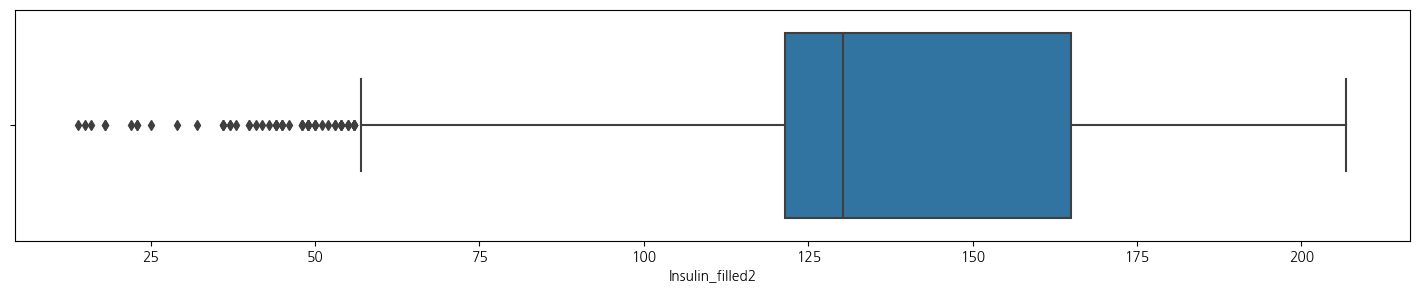

In [194]:
# 이상치 처리 후 값을 시각화 해봅니다

plt.figure(figsize=(18,3))
_ = sns.boxplot(data=df_pima, x="Insulin_filled2")

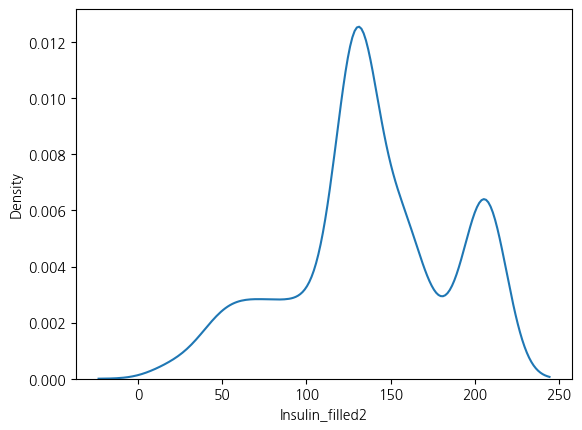

In [148]:
# 이상치 처리 후 값을 시각화 해봅니다
_ = sns.kdeplot(data=df_pima, x="Insulin_filled2")

In [196]:
feature_name.remove("Insulin_filled")
feature_name.append("Insulin_filled2")
feature_name

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled2']

In [197]:
X = df_pima[feature_name]
y = df_pima[label_name]
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [218]:
# 이상치를 처리한 이후에 DT 알고리즘으로 학습과 예측을 해봅니다
# 예상값을 y_pre_max4_mean_out 변수에 저장하면 이후 실습에서 코드를 수정 할 필요가 없습니다

model_max4_mean_out = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=0.8)
model_max4_mean_out.fit(X_train, y_train)
y_pre_max4_mean_out = model_max4_mean_out.predict(X_test)

In [219]:
accuracy_score(y_test, y_pre_max4_mean_out)

0.9155844155844156

이상치를 처리한 후에 성능이 조금 떨어졌음  
통계를 기반으로하는 이상치 처리는 위험할 수도 있음  
효과적인 이상치 탐색을 위해서는 해당 데이터 변수들의 의미와 도메인을 이해하고 원인을 파악하고 처리해야 됨

### Overfitting과 Underfitting
해당 개념도 다뤄보고 싶은데, 사용한 데이터 셋의 크기가 작은 편이라 마땅한 방식을 생각하지 못해 개념만 소개하고 넘어가는걸로..  

##### Overfitting (과적합)
Train 데이터에 과하게 영향을 받아, 훈련 평가 성능은 좋으나 테스트 평가 성능이 낮은 경우

##### Underfitting (과소적합)
Train 데이터의 양이 적어 학습을 제대로하지 못한 경우  

![img](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

[이미지 출처: scikit learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)